# Introdução

## Target

O target deste projeto é G3 (nota final da disciplina), que é uma variável numérica contínua.

## Características Descritivas

As descrições das variáveis abaixo são do arquivo disponibilizado em https://archive.ics.uci.edu/static/public/320/student+performance.zip.
Atributos para o conjunto de dados student-mat.csv (curso de Matemática).

    1 school - escola do aluno (binário: "GP" - Gabriel Pereira ou "MS" - Mousinho da Silveira)
    2 sex - sexo do aluno (binário: "F" - feminino ou "M" - masculino)
    3 age - idade do aluno (numérico: de 15 a 22)
    4 address - tipo de endereço residencial do aluno (binário: "U" - urbano ou "R" - rural)
    5 famsize - tamanho da família (binário: "LE3" - menos ou igual a 3 ou "GT3" - maior que 3)
    6 Pstatus - status de convivência dos pais (binário: "T" - morando juntos ou "A" - apartados)
    7 Medu - educação da mãe (numérico: 0 - nenhum, 1 - educação primária (4ª série), 2 – 5ª a 9ª série, 3 – educação secundária ou 4 – ensino superior)
    8 Fedu - educação do pai (numérico: 0 - nenhum, 1 - educação primária (4ª série), 2 – 5ª a 9ª série, 3 – educação secundária ou 4 – ensino superior)
    9 Mjob - profissão da mãe (nominal: "professora", "relacionada à saúde", "serviços civis" (por exemplo, administrativo ou policial), "em casa" ou "outra")
    10 Fjob - profissão do pai (nominal: "professor", "relacionada à saúde", "serviços civis" (por exemplo, administrativo ou policial), "em casa" ou "outra")
    11 reason - motivo para escolher esta escola (nominal: perto de "casa", "reputação" da escola, preferência de "curso" ou "outro")
    12 guardian - guardião do aluno (nominal: "mãe", "pai" ou "outro")
    13 traveltime - tempo de deslocamento de casa para a escola (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, ou 4 - >1 hora)
    14 studytime - tempo de estudo semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas)
    15 failures - número de falhas em aulas anteriores (numérico: n se 1<=n<3, senão 4)
    16 schoolsup - suporte educacional extra (binário: sim ou não)
    17 famsup - suporte educacional familiar (binário: sim ou não)
    18 paid - aulas extra pagas dentro da disciplina do curso (Matemática ou Português) (binário: sim ou não)
    19 activities - atividades extra-curriculares (binário: sim ou não)
    20 nursery - frequentou creche (binário: sim ou não)
    21 higher - quer fazer ensino superior (binário: sim ou não)
    22 internet - acesso à Internet em casa (binário: sim ou não)
    23 romantic - com um relacionamento romântico (binário: sim ou não)
    24 famrel - qualidade das relações familiares (numérico: de 1 - muito ruim a 5 - excelente)
    25 freetime - tempo livre após a escola (numérico: de 1 - muito baixo a 5 - muito alto)
    26 goout - sair com amigos (numérico: de 1 - muito baixo a 5 - muito alto)
    27 Dalc - consumo de álcool durante a semana (numérico: de 1 - muito baixo a 5 - muito alto)
    28 Walc - consumo de álcool no fim de semana (numérico: de 1 - muito baixo a 5 - muito alto)
    29 health - estado de saúde atual (numérico: de 1 - muito ruim a 5 - muito bom)
    30 absences - número de faltas na escola (numérico: de 0 a 93)

Essas notas estão relacionadas com a disciplina do curso (matemática no nosso caso).

    31 G1 - nota do primeiro período (numérico: de 0 a 20)
    31 G2 - nota do segundo período (numérico: de 0 a 20)
    32 G3 - nota final (numérico: de 0 a 20, alvo de saída)



# Instalando dependências

In [335]:
!pip install gdown
import gdown
import pandas as pd
import zipfile
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2

# Download do arquivo



In [ ]:
url = 'https://archive.ics.uci.edu/static/public/320/student+performance.zip'
output = 'data.zip'
gdown.download(url, output)

Downloading...
From: https://archive.ics.uci.edu/static/public/320/student+performance.zip
To: /content/data.zip
40.7kB [00:00, 913kB/s]


'data.zip'

In [ ]:
outer_zip_file_path = '/content/data.zip'
temp_extract_folder = '/content/temp_extracted_data'
final_extract_folder = '/content/extracted_data'

if not os.path.exists(final_extract_folder):
    os.makedirs(final_extract_folder)

def extract_csv_from_zip(zip_file, extract_folder):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            if file_info.filename.endswith('student-mat.csv'):
                zip_ref.extract(file_info, extract_folder)
                return os.path.join(extract_folder, file_info.filename)

with zipfile.ZipFile(outer_zip_file_path, 'r') as outer_zip_ref:
    outer_zip_ref.extractall(temp_extract_folder)

inner_zip_file_path = os.path.join(temp_extract_folder, 'student.zip')

extracted_csv_path = extract_csv_from_zip(inner_zip_file_path, final_extract_folder)

if os.path.exists(temp_extract_folder):
    shutil.rmtree(temp_extract_folder)

if extracted_csv_path:
    print(f"Arquivo CSV extraído para: {extracted_csv_path}")
else:
    print("Arquivo CSV não encontrado no arquivo ZIP.")

Arquivo CSV extraído para: /content/extracted_data/student-mat.csv


# Preliminares - Visualizando os dados

In [ ]:
df = pd.read_csv('/content/extracted_data/student-mat.csv', delimiter=';');
# Mostrando 20 linhas aleatórias
df.sample(20, random_state=999)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
123,GP,M,16,U,GT3,T,4,4,health,other,...,3,4,4,1,4,5,18,14,11,13
151,GP,M,16,U,LE3,T,2,1,at_home,other,...,4,4,4,3,5,5,6,12,13,14
328,GP,F,17,U,GT3,T,4,4,teacher,services,...,5,4,4,1,3,4,7,10,9,9
187,GP,M,16,U,LE3,T,2,1,other,other,...,4,2,3,1,2,5,0,15,15,15
156,GP,M,17,R,LE3,T,1,2,other,other,...,2,2,2,3,3,5,8,16,12,13
361,MS,M,18,R,LE3,T,1,1,at_home,other,...,4,4,3,2,3,5,2,13,12,12
373,MS,F,17,R,GT3,T,1,2,other,other,...,3,5,5,1,3,1,14,6,5,5
278,GP,F,18,U,GT3,T,4,4,health,health,...,2,4,4,1,1,4,15,9,8,8
222,GP,F,16,U,GT3,T,2,3,services,teacher,...,2,3,1,1,1,3,2,16,16,17
243,GP,M,16,U,GT3,T,4,4,services,services,...,5,3,2,1,2,5,0,13,12,12


In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
print(f"Número de linhas e colunas são {df.shape} \n")
print(f"Os tipos de dados estão abaixo, onde 'objeto' indica um tipo de string: ")
print(df.dtypes)

Número de linhas e colunas são (395, 33) 

Os tipos de dados estão abaixo, onde 'objeto' indica um tipo de string: 
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [ ]:
#Tabela das variáveis contínuas
numeric_df = df.select_dtypes(include='int64')
numeric_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
#Tabela das variáveis categóricas
categorical_df = df.select_dtypes(include='object')
categorical_df.describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [ ]:
categorical_columns = df.columns[df.dtypes==object].tolist()

for col in categorical_columns:
    print('Valores únicos para ' + col)
    print(df[col].unique())
    print('')

Valores únicos para school
['GP' 'MS']

Valores únicos para sex
['F' 'M']

Valores únicos para address
['U' 'R']

Valores únicos para famsize
['GT3' 'LE3']

Valores únicos para Pstatus
['A' 'T']

Valores únicos para Mjob
['at_home' 'health' 'other' 'services' 'teacher']

Valores únicos para Fjob
['teacher' 'other' 'services' 'health' 'at_home']

Valores únicos para reason
['course' 'other' 'home' 'reputation']

Valores únicos para guardian
['mother' 'father' 'other']

Valores únicos para schoolsup
['yes' 'no']

Valores únicos para famsup
['no' 'yes']

Valores únicos para paid
['no' 'yes']

Valores únicos para activities
['no' 'yes']

Valores únicos para nursery
['yes' 'no']

Valores únicos para higher
['yes' 'no']

Valores únicos para internet
['no' 'yes']

Valores únicos para romantic
['no' 'yes']



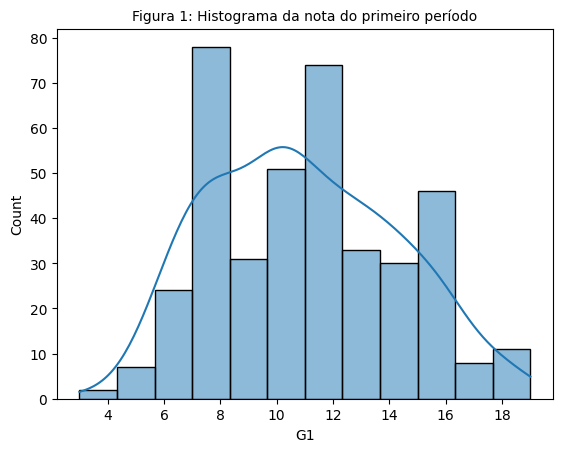

In [ ]:
sns.histplot(df['G1'], kde = True).set_title('Figura 1: Histograma da nota do primeiro período', fontsize = 10)
plt.show();

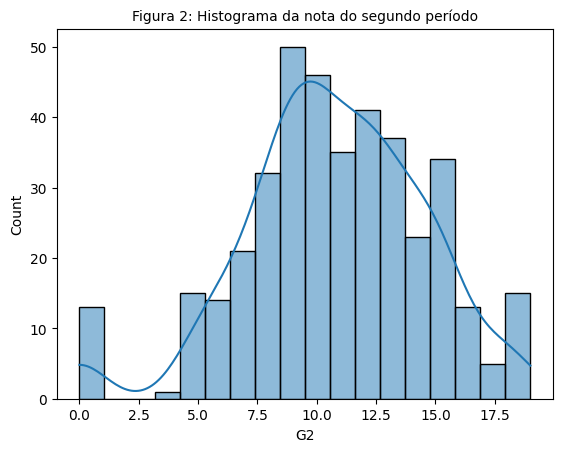

In [ ]:
sns.histplot(df['G2'], kde = True).set_title('Figura 2: Histograma da nota do segundo período', fontsize = 10)
plt.show();

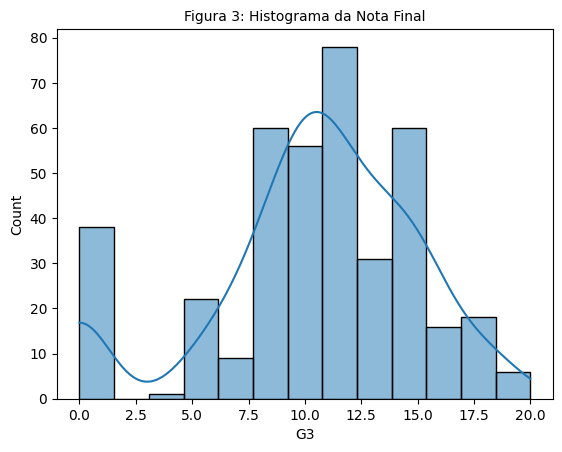

In [ ]:
sns.histplot(df['G3'], kde = True).set_title('Figura 3: Histograma da Nota Final', fontsize = 10)
plt.show();

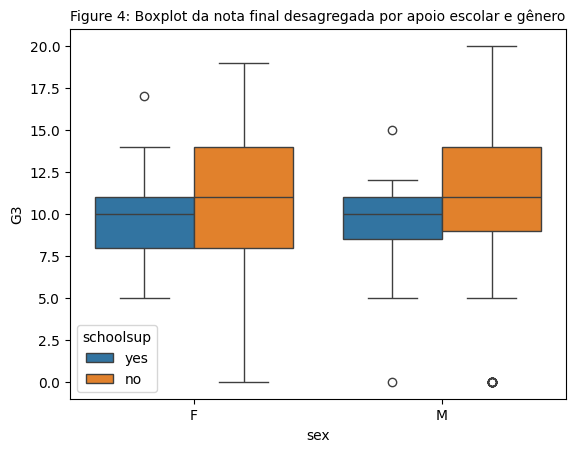

In [ ]:
gender_mask = df['sex'].isin(['F','M'])

school_sup_mask = (df['schoolsup'].isin(['yes','no']))

education_relationship = df[(gender_mask & school_sup_mask)]

sns.boxplot(x='sex', y='G3', hue='schoolsup', data=df)
plt.title('Figure 4: Boxplot da nota final desagregada por apoio escolar e gênero', fontsize = 10)
plt.show();

Text(0.5, 1.0, 'Mapa de calor de correlação')

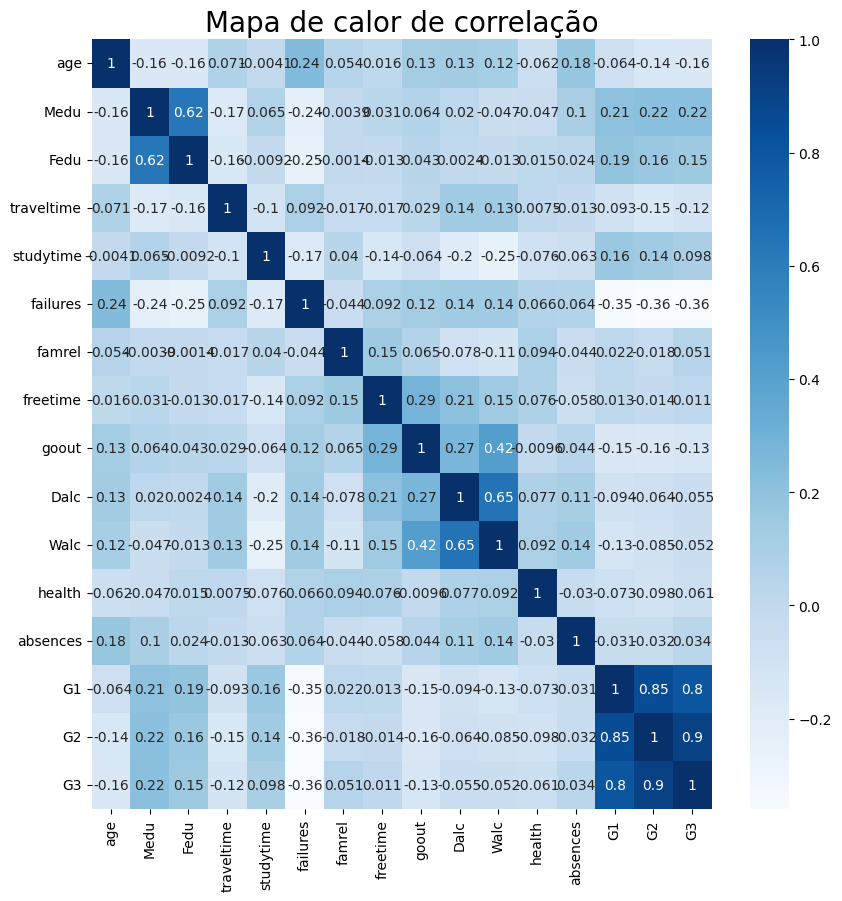

In [ ]:
correlation = numeric_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.title('Mapa de calor de correlação', fontsize=20)

# Pré-processamento dos dados

In [ ]:
df['G3'] = np.where(df['G3'] >= 12, 'sucesso', 'insucesso')
print(df['G3'].head(10))

0    insucesso
1    insucesso
2    insucesso
3      sucesso
4    insucesso
5      sucesso
6    insucesso
7    insucesso
8      sucesso
9      sucesso
Name: G3, dtype: object


Text(0, 0.5, 'Número de Estudantes')

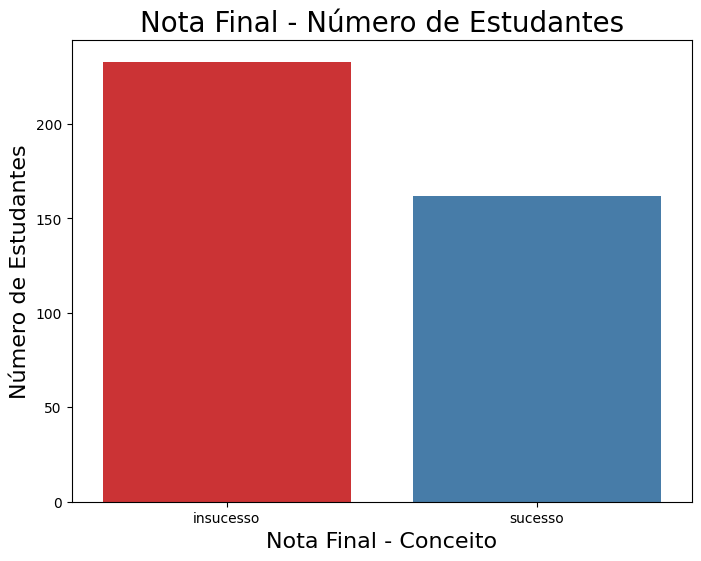

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='G3', hue='G3', palette='Set1', legend=False)
plt.title('Nota Final - Número de Estudantes',fontsize=20)
plt.xlabel('Nota Final - Conceito', fontsize=16)
plt.ylabel('Número de Estudantes', fontsize=16)

In [ ]:
df_cleaned = df.dropna()

df_cleaned = df_cleaned.drop_duplicates()

print("Número de linhas após remoção de dados faltantes e duplicados:", len(df_cleaned))

Número de linhas após remoção de dados faltantes e duplicados: 395


In [ ]:
#one-hot-encoding das variáveis categóricas - transformando-as em booleanos
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)
df_encoded.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,G3_sucesso
0,18,4,4,2,2,0,4,3,4,1,...,False,True,False,False,False,True,True,False,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,True,False,False,False,True,True,False,False
2,15,1,1,1,2,3,4,3,2,2,...,False,True,False,True,False,True,True,True,False,False
3,15,4,2,1,3,0,3,2,2,1,...,False,False,True,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,True,True,False,True,True,False,False,False


# Treino e avaliação do modelo

### Usando os dados para prever a nota final

In [344]:
def dt_classification():

  df_class = df_encoded.copy()

  le = preprocessing.LabelEncoder()
  df_class.G3_sucesso = le.fit_transform(df_class.G3_sucesso)

  X = df_class.drop('G3_sucesso', axis=1)
  y = df_class.G3_sucesso
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  X_train = pd.get_dummies(X_train)
  X_test = pd.get_dummies(X_test)

  msl = []
  for i in range(1, 58):
      tree = DecisionTreeClassifier(min_samples_leaf=i)
      t = tree.fit(X_train, y_train)
      ts = t.score(X_test, y_test)
      msl.append(ts)
  msl = pd.Series(msl)
  if len(msl) > 0:
    best_min_samples_leaf = msl.where(msl == msl.max()).dropna().index[0] + 1
  else:
    best_min_samples_leaf = 1

  tree = DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf)
  tree.fit(X_train, y_train)

  # Fazendo previsões no conjunto de teste
  y_pred = tree.predict(X_test)

  # Calculando a acurácia das previsões
  accuracy = accuracy_score(y_test, y_pred)

  return accuracy, best_min_samples_leaf

In [346]:
def lr_classification():

  df_class = df_encoded.copy()

  le = preprocessing.LabelEncoder()
  df_class.G3_sucesso = le.fit_transform(df_class.G3_sucesso)

  X = df_class.drop('G3_sucesso', axis=1)
  y = df_class.G3_sucesso
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  X_train = pd.get_dummies(X_train)
  X_test = pd.get_dummies(X_test)

  lr = LogisticRegression(multi_class='multinomial', solver='newton-cg', fit_intercept=True)
  ks = []
  for i in range(1, X_train.shape[1] + 1):  # Garantindo que k seja no máximo o número de características disponíveis
      sk = SelectKBest(chi2, k=i)
      x_new_train = sk.fit_transform(X_train, y_train)
      x_new_test = sk.transform(X_test)  # Usando transform em vez de fit_transform para manter as mesmas características
      l = lr.fit(x_new_train, y_train)
      ll = l.score(x_new_test, y_test)
      ks.append(ll)

  ks = pd.Series(ks)
  ks = ks.reindex(list(range(1, X_train.shape[1] + 1)))

  ks.where(ks==ks.max()).dropna()

  sk = SelectKBest(chi2, k=8)
  x_new = sk.fit_transform(X_train,y_train)
  x_new_test=sk.fit_transform(X_test,y_test)
  lr = lr.fit(x_new, y_train)
  accuracy_lr = lr.score(x_new, y_train)
  return accuracy_lr

In [355]:
for i in range(1, 11):
  accuracy, best_min_samples_leaf = dt_classification()
  evaluation_str = f"Acurácia do modelo de árvore de decisão no cenário de teste {i}: {accuracy}, Número mínimo de amostras: {best_min_samples_leaf}"
  print(evaluation_str)

Acurácia do modelo de árvore de decisão no cenário de teste 1: 0.9079831932773109, Número mínimo de amostras: 7
Acurácia do modelo de árvore de decisão no cenário de teste 2: 0.8659663865546218, Número mínimo de amostras: 3
Acurácia do modelo de árvore de decisão no cenário de teste 3: 0.9163865546218487, Número mínimo de amostras: 16
Acurácia do modelo de árvore de decisão no cenário de teste 4: 0.8743697478991597, Número mínimo de amostras: 4
Acurácia do modelo de árvore de decisão no cenário de teste 5: 0.9079831932773109, Número mínimo de amostras: 6
Acurácia do modelo de árvore de decisão no cenário de teste 6: 0.899579831932773, Número mínimo de amostras: 4
Acurácia do modelo de árvore de decisão no cenário de teste 7: 0.9247899159663865, Número mínimo de amostras: 8
Acurácia do modelo de árvore de decisão no cenário de teste 8: 0.8911764705882352, Número mínimo de amostras: 9
Acurácia do modelo de árvore de decisão no cenário de teste 9: 0.8911764705882352, Número mínimo de amos

In [356]:
for i in range(1, 11):
  accuracy = lr_classification()
  evaluation_str = f"Acurácia do modelo de regressão logística no cenário de teste {i}: {accuracy}"
  print(evaluation_str)

Acurácia do modelo de regressão logística no cenário de teste 1: 0.9528985507246377
Acurácia do modelo de regressão logística no cenário de teste 2: 0.9384057971014492
Acurácia do modelo de regressão logística no cenário de teste 3: 0.9420289855072463
Acurácia do modelo de regressão logística no cenário de teste 4: 0.9384057971014492
Acurácia do modelo de regressão logística no cenário de teste 5: 0.9492753623188406
Acurácia do modelo de regressão logística no cenário de teste 6: 0.9384057971014492
Acurácia do modelo de regressão logística no cenário de teste 7: 0.9420289855072463
Acurácia do modelo de regressão logística no cenário de teste 8: 0.9492753623188406
Acurácia do modelo de regressão logística no cenário de teste 9: 0.927536231884058
Acurácia do modelo de regressão logística no cenário de teste 10: 0.9492753623188406


Ao analisar os resultados desses dois modelos - a árvore de decisão e a regressão logística -, foi mais uma questão de eu achar legal testar diferentes abordagens para o mesmo problema. Foi uma espécie de "vamos ver o que cada um desses caras pode fazer"! Observando os resultados, tanto a árvore de decisão quanto a regressão logística se saíram muito bem, com acurácias sólidas em todos os cenários de teste.

No caso do modelo de árvore de decisão, observamos que suas acurácias variam entre aproximadamente 0.87 e 0.92 nos diferentes cenários de teste, com números mínimos de amostras variando de 3 a 16. Por outro lado, o modelo de regressão logística exibe acurácias ligeiramente superiores, variando de aproximadamente 0.93 a 0.95 nos diferentes cenários de teste. No entanto, para melhorar ainda mais esses modelos, seria vantajoso considerar a coleta de mais dados de avaliação acadêmica. Dessa forma, poderíamos enriquecer nossos conjuntos de dados e fornecer aos modelos mais informações relevantes para melhorar sua capacidade de previsão.

OBS: Optei por utilizar tanto o conjunto de treinamento quanto o de teste em cada chamada de função, o que implicou no treinamento e teste repetidos dos modelos. Esta escolha foi motivada pela intenção de garantir que cada avaliação do modelo fosse realizada em um conjunto de dados independente, permitindo uma avaliação mais robusta do desempenho dos modelos em diferentes cenários.
Essa abordagem permite que cada modelo seja reajustado e avaliado em novos conjuntos de dados, refletindo melhor a capacidade de generalização do modelo para dados desconhecidos. Embora possa ser menos eficiente computacionalmente do que simplesmente treinar o modelo uma vez e usar o mesmo conjunto de teste em todas as avaliações, essa abordagem proporciona uma avaliação mais confiável e realista do desempenho do modelo em cenários do mundo real.

